# Statistical analysis of the data

We will perform a statistical analysis of the data to get an overview of the malware families and their properties.

## Load data

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
malware_data = pd.read_csv(
    'data/malware-full-data-cleaned.csv',
    sep=";",
    dtype={'MITRE ID': pd.StringDtype(),
           'Platforms': pd.StringDtype(),
           'Techniques Used': pd.StringDtype(),
           'Description': pd.StringDtype(),
           'Name': pd.StringDtype()},
    parse_dates=['Created', 'Last Modified'],
)
malware_data = malware_data.rename(columns={'MITRE ID': 'MITRE_ID'})
malware_data = malware_data.fillna('')
len(malware_data)

36

## Types of steganography used

### Automatically detect steganography families in malware descriptions and techniques used

In [17]:
lsb_malware = malware_data[
    (malware_data['Description'].str.contains('LSB') == True) |
    (malware_data['Techniques Used'].str.contains('LSB') == True) |
    (malware_data['Description'].str.contains('Least Significant Bit') == True) |
    (malware_data['Techniques Used'].str.contains('Least Significant Bit') == True)
    ]
lsb_malware.reset_index(inplace=True, drop=True)
num_lsb_malware = len(lsb_malware)

xor_malware = malware_data[
    (malware_data['Description'].str.contains('XOR') == True) |
    (malware_data['Techniques Used'].str.contains('XOR') == True)
    ]
xor_malware.reset_index(inplace=True, drop=True)
num_xor_malware = len(xor_malware)

eof_malware = malware_data[
    (malware_data['Description'].str.contains('append') == True) |
    (malware_data['Techniques Used'].str.contains('append') == True)
    ]
eof_malware.reset_index(inplace=True, drop=True)
num_eof_malware = len(eof_malware)

pd.DataFrame({
    'Steganography Type': ['LSB', 'XOR', 'End of File', 'Unknown'],
    'Number of Malware Families': [num_lsb_malware, num_xor_malware, num_eof_malware,
                                   len(malware_data) - num_lsb_malware - num_xor_malware - num_eof_malware]
})

,Steganography Type,Number of Malware Families
0,LSB,2
1,XOR,2
2,End of File,2
3,Unknown,30


In [18]:
# Print Unknown
malware_data[(~malware_data.index.isin(lsb_malware.index)) &
             (~malware_data.index.isin(xor_malware.index)) &
             (~malware_data.index.isin(eof_malware.index))]

,Name,Description,Type,Platforms,Version,Created,Last Modified,MITRE_ID,Techniques Used,Contributors,Associated Software,References
2,Avenger,Avenger is a downloader that has been used by ...,MALWARE,Windows,1.1,2020-06-11,2024-04-11,S0473,Avenger can extract backdoor malware from down...,,,https://documents.trendmicro.com/assets/pdf/Op...
3,Bandook,"Bandook is a commercially available RAT, writt...",MALWARE,Windows,2.0,2018-10-17,2021-10-11,S0234,Bandook has used .PNG images within a zip file...,,,https://research.checkpoint.com/2020/bandook-s...
4,build_downer,build_downer is a downloader that has been use...,MALWARE,Windows,1.0,2020-06-10,2020-06-24,S0471,build_downer can extract malware from a downlo...,,,https://documents.trendmicro.com/assets/pdf/Op...
5,Daserf,Daserf is a backdoor that has been used to spy...,MALWARE,Windows,1.1,2018-01-16,2020-03-30,S0187,Daserf can use steganography to hide malicious...,,"Muirim, Nioupale",https://www.trendmicro.com/en_us/research/17/k...
6,Diavol,Diavol is a ransomware variant first observed ...,MALWARE,Windows,2.0,2021-11-12,2023-12-04,S0659,Diavol has obfuscated its main code routines w...,"Massimiliano Romano, BT Security",,https://www.fortinet.com/blog/threat-research/...
7,Duqu,Duqu is a malware platform that uses a modular...,MALWARE,Windows,1.2,2017-05-31,2023-03-08,S0038,When the Duqu command and control is operating...,,,
8,HAMMERTOSS,HAMMERTOSS is a backdoor that was used by APT2...,MALWARE,Windows,1.2,2017-05-31,2021-02-09,S0037,HAMMERTOSS is controlled via commands that are...,,"HammerDuke, NetDuke",https://www.mandiant.com/resources/reports/ham...
9,IcedID,IcedID is a modular banking malware designed t...,MALWARE,Windows,1.1,2020-07-15,2024-04-11,S0483,IcedID has embedded binaries within RC4 encryp...,,,https://blogs.juniper.net/en-us/threat-researc...
10,Invoke-PSImage,Invoke-PSImage takes a PowerShell script and e...,TOOL,,1.1,2018-04-18,2022-10-18,S0231,Invoke-PSImage can be used to embed a PowerShe...,,,https://github.com/peewpw/Invoke-PSImage
11,LightNeuron,LightNeuron is a sophisticated backdoor that h...,MALWARE,"Windows, Linux",1.2,2019-06-28,2024-04-11,S0395,LightNeuron is controlled via commands that ar...,,,https://web-assets.esetstatic.com/wls/2019/05/...


### Manually assign steganography families

In [19]:
lsb_malware_mitre_ids = ['S0234', 'S0231', 'S0513', 'S0644', 'S0518']
lsb_malware_names = ['Gatak/Stegoloader']
lsb_malware = pd.concat([
    lsb_malware,
    malware_data.query('Name in @lsb_malware_names'),
    malware_data[
        malware_data.apply(lambda x: any([mitre_id in x['MITRE_ID'] for mitre_id in lsb_malware_mitre_ids]), axis=1)]])
lsb_malware.drop_duplicates(inplace=True)

xor_malware_mitre_ids = ['S0395', 'S0473']
xor_malware_names = ['APT37', 'StegBaus']
xor_malware = pd.concat([
    xor_malware,
    malware_data.query('Name in @xor_malware_names'),
    malware_data[
        malware_data.apply(lambda x: any([mitre_id in x['MITRE_ID'] for mitre_id in xor_malware_mitre_ids]), axis=1)]])
xor_malware.drop_duplicates(inplace=True)

eof_malware_mitre_ids = ['S0458', 'S0037']
eof_malware_names = ['MyKings Botnet hiding malicious data exchanges']
eof_malware = pd.concat([
    eof_malware,
    malware_data.query('Name in @eof_malware_names'),
    malware_data[
        malware_data.apply(lambda x: any([mitre_id in x['MITRE_ID'] for mitre_id in eof_malware_mitre_ids]), axis=1)]])
eof_malware.drop_duplicates(inplace=True)

struct_malware_mitre_ids = ['S0483', 'S0439', 'S0518']
struct_malware_names = ['SteamHide exploits Steam profile images to download malware', 'SyncCrypts']
struct_malware = pd.concat([
    malware_data.query('Name in @struct_malware_names'),
    malware_data[malware_data.apply(lambda x: any([mitre_id in x['MITRE_ID'] for mitre_id in struct_malware_mitre_ids]),
                                    axis=1)]])
struct_malware.drop_duplicates(inplace=True)

non_image_malware_mitre_ids = ['S0565', 'S0559']

malware_data['Steganography Type'] = malware_data.index.map(
    lambda
        x: 'LSB' if x in lsb_malware.index else 'XOR' if x in xor_malware.index else 'End of File' if x in eof_malware.index else 'Structural' if x in struct_malware.index else 'Unknown')

num_eof_malware = len(eof_malware)
num_lsb_malware = len(lsb_malware)
num_xor_malware = len(xor_malware)
num_struct_malware = len(struct_malware)
num_unknown_malware = len(malware_data) - num_lsb_malware - num_xor_malware - num_eof_malware - num_struct_malware

stego_fam_data = pd.DataFrame({
    'Stego-Verfahren': ['LSB', 'XOR', 'Anhängen', 'Struktur', 'Unbekannt'],
    'Anzahl an Malware-Vorkommnissen': [num_lsb_malware, num_xor_malware, num_eof_malware, num_struct_malware,
                                        num_unknown_malware]
})
stego_fam_data

,Stego-Verfahren,Anzahl an Malware-Vorkommnissen
0,LSB,8
1,XOR,6
2,Anhängen,4
3,Struktur,3
4,Unbekannt,15


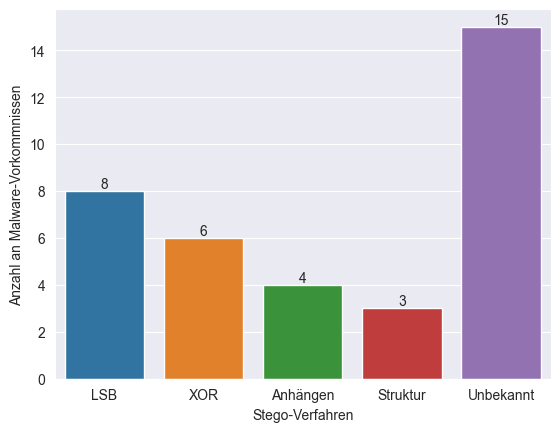

In [20]:
ax = sns.barplot(stego_fam_data, x='Stego-Verfahren', y='Anzahl an Malware-Vorkommnissen', hue='Stego-Verfahren')
for i in ax.containers:
    ax.bar_label(i, )
plt.savefig('../assets/images/malware-stego-fam.png')

In [21]:
malware_data

,Name,Description,Type,Platforms,Version,Created,Last Modified,MITRE_ID,Techniques Used,Contributors,Associated Software,References,Steganography Type
0,ABK,ABK is a downloader that has been used by BRON...,MALWARE,Windows,1.0,2020-06-10,2020-06-24,S0469,ABK can extract a malicious Portable Executabl...,,,https://documents.trendmicro.com/assets/pdf/Op...,LSB
1,Agent Smith,Agent Smith is mobile malware that generates f...,MALWARE,Android,1.0,2020-05-07,2020-06-17,S0440,Agent Smith’s core malware is disguised as a J...,"Aviran Hazum, Check Point; Sergey Persikov, C...",,https://documents.trendmicro.com/assets/pdf/Op...,LSB
2,Avenger,Avenger is a downloader that has been used by ...,MALWARE,Windows,1.1,2020-06-11,2024-04-11,S0473,Avenger can extract backdoor malware from down...,,,https://documents.trendmicro.com/assets/pdf/Op...,XOR
3,Bandook,"Bandook is a commercially available RAT, writt...",MALWARE,Windows,2.0,2018-10-17,2021-10-11,S0234,Bandook has used .PNG images within a zip file...,,,https://research.checkpoint.com/2020/bandook-s...,LSB
4,build_downer,build_downer is a downloader that has been use...,MALWARE,Windows,1.0,2020-06-10,2020-06-24,S0471,build_downer can extract malware from a downlo...,,,https://documents.trendmicro.com/assets/pdf/Op...,Unknown
5,Daserf,Daserf is a backdoor that has been used to spy...,MALWARE,Windows,1.1,2018-01-16,2020-03-30,S0187,Daserf can use steganography to hide malicious...,,"Muirim, Nioupale",https://www.trendmicro.com/en_us/research/17/k...,Unknown
6,Diavol,Diavol is a ransomware variant first observed ...,MALWARE,Windows,2.0,2021-11-12,2023-12-04,S0659,Diavol has obfuscated its main code routines w...,"Massimiliano Romano, BT Security",,https://www.fortinet.com/blog/threat-research/...,Unknown
7,Duqu,Duqu is a malware platform that uses a modular...,MALWARE,Windows,1.2,2017-05-31,2023-03-08,S0038,When the Duqu command and control is operating...,,,,Unknown
8,HAMMERTOSS,HAMMERTOSS is a backdoor that was used by APT2...,MALWARE,Windows,1.2,2017-05-31,2021-02-09,S0037,HAMMERTOSS is controlled via commands that are...,,"HammerDuke, NetDuke",https://www.mandiant.com/resources/reports/ham...,Unknown
9,IcedID,IcedID is a modular banking malware designed t...,MALWARE,Windows,1.1,2020-07-15,2024-04-11,S0483,IcedID has embedded binaries within RC4 encryp...,,,https://blogs.juniper.net/en-us/threat-researc...,Structural


## Attacks per platform

In [22]:
platforms = (malware_data['Platforms'].str.split(', ', expand=True)
             .stack()
             .map(lambda x: x.strip())
             .map(lambda x: 'Unbekannt' if x == "" else x)
             .value_counts())
platforms

Windows      25
Unbekannt     8
macOS         4
Android       3
Linux         2
iOS           2
Name: count, dtype: int64

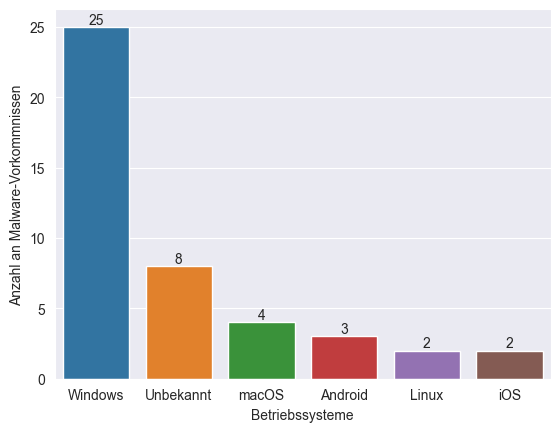

In [23]:
ax = sns.barplot(
    platforms
    .rename_axis('Betriebssysteme')
    .to_frame('Anzahl an Malware-Vorkommnissen'),
    x='Betriebssysteme',
    y='Anzahl an Malware-Vorkommnissen',
    hue='Betriebssysteme')
for i in ax.containers:
    ax.bar_label(i, )
plt.savefig('../assets/images/malware-platforms.png')

## Types of carriers used

In [24]:
jpg_malware = malware_data[
    (malware_data['Description'].str.contains('jpg', case=False) == True) |
    (malware_data['Techniques Used'].str.contains('jpg', case=False) == True)
    ]
num_jpg_malware = len(jpg_malware)

png_malware = malware_data[
    (malware_data['Description'].str.contains('png', case=False) == True) |
    (malware_data['Techniques Used'].str.contains('png', case=False) == True)
    ]
num_png_malware = len(png_malware)

bmp_malware = malware_data[
    (malware_data['Description'].str.contains('bmp', case=False) == True) |
    (malware_data['Techniques Used'].str.contains('bmp', case=False) == True)
    ]
num_bmp_malware = len(bmp_malware)

gif_malware = malware_data[
    (malware_data['Description'].str.contains('gif', case=False) == True) |
    (malware_data['Techniques Used'].str.contains('gif', case=False) == True)
    ]
num_gif_malware = len(gif_malware)

tiff_malware = malware_data[
    (malware_data['Description'].str.contains('tiff', case=False) == True) |
    (malware_data['Techniques Used'].str.contains('tiff', case=False) == True)
    ]
num_tiff_malware = len(tiff_malware)

pdf_malware = malware_data[
    (malware_data['Description'].str.contains('pdf', case=False) == True) |
    (malware_data['Techniques Used'].str.contains('pdf', case=False) == True)
    ]
num_pdf_malware = len(pdf_malware)

carrier_types_data = pd.DataFrame({
    'Carrier Type': ['JPEG', 'PNG', 'BMP', 'GIF', 'TIFF', 'PDF', 'Unknown'],
    'Number of Malware Families': [num_jpg_malware, num_png_malware, num_bmp_malware, num_gif_malware, num_tiff_malware,
                                   num_pdf_malware,
                                   len(malware_data) - num_jpg_malware - num_png_malware - num_bmp_malware - num_gif_malware - num_tiff_malware - num_pdf_malware]
})
carrier_types_data

,Carrier Type,Number of Malware Families
0,JPEG,5
1,PNG,9
2,BMP,3
3,GIF,0
4,TIFF,0
5,PDF,2
6,Unknown,17


In [25]:
# Print Unknown
malware_data[(~malware_data.index.isin(jpg_malware.index)) &
             (~malware_data.index.isin(png_malware.index)) &
             (~malware_data.index.isin(bmp_malware.index)) &
             (~malware_data.index.isin(gif_malware.index)) &
             (~malware_data.index.isin(tiff_malware.index)) &
             (~malware_data.index.isin(pdf_malware.index))]

,Name,Description,Type,Platforms,Version,Created,Last Modified,MITRE_ID,Techniques Used,Contributors,Associated Software,References,Steganography Type
0,ABK,ABK is a downloader that has been used by BRON...,MALWARE,Windows,1.0,2020-06-10,2020-06-24,S0469,ABK can extract a malicious Portable Executabl...,,,https://documents.trendmicro.com/assets/pdf/Op...,LSB
2,Avenger,Avenger is a downloader that has been used by ...,MALWARE,Windows,1.1,2020-06-11,2024-04-11,S0473,Avenger can extract backdoor malware from down...,,,https://documents.trendmicro.com/assets/pdf/Op...,XOR
4,build_downer,build_downer is a downloader that has been use...,MALWARE,Windows,1.0,2020-06-10,2020-06-24,S0471,build_downer can extract malware from a downlo...,,,https://documents.trendmicro.com/assets/pdf/Op...,Unknown
5,Daserf,Daserf is a backdoor that has been used to spy...,MALWARE,Windows,1.1,2018-01-16,2020-03-30,S0187,Daserf can use steganography to hide malicious...,,"Muirim, Nioupale",https://www.trendmicro.com/en_us/research/17/k...,Unknown
6,Diavol,Diavol is a ransomware variant first observed ...,MALWARE,Windows,2.0,2021-11-12,2023-12-04,S0659,Diavol has obfuscated its main code routines w...,"Massimiliano Romano, BT Security",,https://www.fortinet.com/blog/threat-research/...,Unknown
8,HAMMERTOSS,HAMMERTOSS is a backdoor that was used by APT2...,MALWARE,Windows,1.2,2017-05-31,2021-02-09,S0037,HAMMERTOSS is controlled via commands that are...,,"HammerDuke, NetDuke",https://www.mandiant.com/resources/reports/ham...,Unknown
12,LiteDuke,LiteDuke is a third stage backdoor that was us...,MALWARE,Windows,1.0,2020-09-24,2021-10-04,S0513,LiteDuke has used image files to hide its load...,,,https://web-assets.esetstatic.com/wls/2019/10/...,LSB
15,PolyglotDuke,PolyglotDuke is a downloader that has been use...,MALWARE,Windows,1.1,2020-09-23,2023-03-26,S0518,PolyglotDuke can use steganography to hide C2 ...,,,https://web-assets.esetstatic.com/wls/2019/10/...,LSB
18,Ramsay,Ramsay is an information stealing malware fram...,MALWARE,Windows,1.1,2020-05-27,2021-04-14,S0458,Ramsay has PE data embedded within JPEG files ...,"Harry Kim, CODEMIZE",,https://www.programmersought.com/article/62493...,End of File
20,RegDuke,RegDuke is a first stage implant written in .N...,MALWARE,Windows,1.1,2020-09-23,2023-03-24,S0511,"RegDuke can hide data in images, including use...",,,https://web-assets.esetstatic.com/wls/2019/10/...,Unknown


In [26]:
pdf_malware_names = ['ABK', 'Avenger']
pdf_malware = pd.concat([
    pdf_malware,
    malware_data.query('Name in @pdf_malware_names')])
pdf_malware.drop_duplicates(inplace=True)

jpg_malware_names = ['ABK', 'Avenger', 'build_downer', 'Daserf', 'HAMMERTOSS', 'Ramsay', 'APT37',
                     'Malware hidden in images from the James Webb telescope', 'SyncCrypt']
jpg_malware = pd.concat([
    jpg_malware,
    malware_data.query('Name in @jpg_malware_names')])
jpg_malware.drop_duplicates(inplace=True)

gif_malware_names = ['Daserf', 'PolyglotDuke']
gif_malware = pd.concat([
    gif_malware,
    malware_data.query('Name in @gif_malware_names')])
gif_malware.drop_duplicates(inplace=True)

bmp_malware_names = ['Diavol', 'ZeroT']
bmp_malware = pd.concat([
    bmp_malware,
    malware_data.query('Name in @bmp_malware_names')])
bmp_malware.drop_duplicates(inplace=True)

png_malware_names = ['LiteDuke', 'RegDuke', 'Titanium', 'StegBaus', 'Lumma', 'Malware',
                     'requests-darwin-lite']
png_malware = pd.concat([
    png_malware,
    malware_data.query('Name in @png_malware_names')])
png_malware.drop_duplicates(inplace=True)


def get_carrier_type(x):
    def filter_not_none(lst):
        return list(filter(None, lst))

    return ', '.join(filter_not_none([
        'JPEG' if x in jpg_malware.index else None,
        'PNG' if x in png_malware.index else None,
        'BMP' if x in bmp_malware.index else None,
        'GIF' if x in gif_malware.index else None,
        'PDF' if x in pdf_malware.index else None,
    ])).strip(',')


malware_data['Carrier Types'] = (malware_data.index
                                 .map(get_carrier_type)
                                 .map(lambda x: 'Unknown' if x == "" else x))

num_jpg_malware = len(jpg_malware)
num_png_malware = len(png_malware)
num_bmp_malware = len(bmp_malware)
num_gif_malware = len(gif_malware)
num_pdf_malware = len(pdf_malware)
num_unknown_malware = len(malware_data) - len(
    set(jpg_malware.index) | set(png_malware.index) | set(bmp_malware.index) | set(gif_malware.index) | set(
        tiff_malware.index) | set(pdf_malware.index))

carrier_types_data = pd.DataFrame({
    'Medientyp': ['JPEG', 'PNG', 'BMP', 'GIF', 'PDF', 'Unbekannt'],
    'Anzahl an Malware-Vorkommnissen': [num_jpg_malware, num_png_malware, num_bmp_malware, num_gif_malware,
                                        num_pdf_malware, num_unknown_malware]
})
carrier_types_data

,Medientyp,Anzahl an Malware-Vorkommnissen
0,JPEG,14
1,PNG,15
2,BMP,5
3,GIF,2
4,PDF,4
5,Unbekannt,1


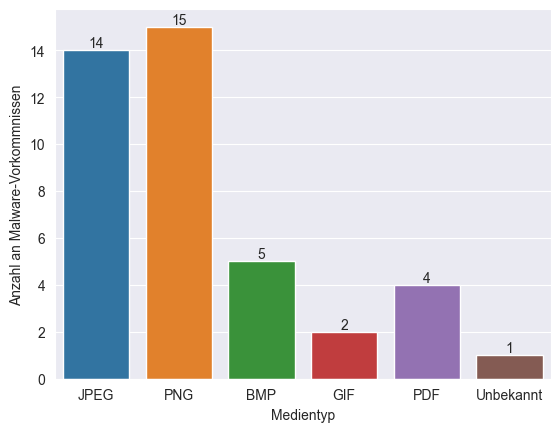

In [27]:
ax = sns.barplot(carrier_types_data, x='Medientyp', y='Anzahl an Malware-Vorkommnissen', hue='Medientyp')
for i in ax.containers:
    ax.bar_label(i, )
plt.savefig('../assets/images/malware-carrier-types.png')

## Create a sample of the merged data

We will create a sample of the merged data to get an overview of the malware families and their properties.

In [28]:
malware_data.to_csv(
    'data/malware-full-data-cleaned-extended.csv',
    sep=";",
    index=False,
)

malware_data_samples = malware_data.sort_values(by='Created', ascending=False)
malware_data_samples = malware_data_samples[malware_data_samples['Name'].str.match("[\"{}@]") == False]
malware_data_samples = malware_data_samples.head(10)[
    ['Name', 'Platforms', 'Created', 'Last Modified', 'MITRE_ID', 'Carrier Types', 'Steganography Type']
]
malware_data_samples = malware_data_samples.rename(columns={
    'Platforms': 'Plattformen',
    'MITRE_ID': 'MITRE-ID',
    'Created': 'Erstellt am',
    'Last Modified': 'Zuletzt geändert',
    'Carrier Types': 'Medientypen',
    'Steganography Type': 'Stego-Verfahren'
})
malware_data_samples['Stego-Verfahren'] = malware_data_samples['Stego-Verfahren'].map(
    lambda x: 'Unbekannt' if x == 'Unknown' else x)
malware_data_samples.to_csv(
    'data/malware-samples.csv',
    sep=";",
    index=False,
    columns=['Name', 'Plattformen', 'Erstellt am', 'Zuletzt geändert', 'MITRE-ID', 'Medientypen', 'Stego-Verfahren'],
    date_format='%d.%m.%Y',
)
malware_data_samples

,Name,Plattformen,Erstellt am,Zuletzt geändert,MITRE-ID,Medientypen,Stego-Verfahren
35,requests-darwin-lite,macOS,2024-05-13,NaT,,PNG,Unbekannt
24,APT37,Windows,2023-02-14,NaT,,JPEG,XOR
23,Zox,Windows,2022-01-09,2024-04-10,S0672,PNG,Unbekannt
6,Diavol,Windows,2021-11-12,2023-12-04,S0659,BMP,Unbekannt
17,ProLock,Windows,2021-09-30,2021-10-15,S0654,"JPEG, BMP",Unbekannt
13,ObliqueRAT,Windows,2021-09-08,2021-10-15,S0644,BMP,LSB
21,Sliver,"Windows, Linux, macOS",2021-07-30,2024-04-11,S0633,PNG,Unbekannt
12,LiteDuke,Windows,2020-09-24,2021-10-04,S0513,PNG,LSB
15,PolyglotDuke,Windows,2020-09-23,2023-03-26,S0518,GIF,LSB
20,RegDuke,Windows,2020-09-23,2023-03-24,S0511,PNG,Unbekannt
